In [132]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [133]:
def calculate_e_dm(redshift,sb_limit,sigma_R):
    denom = sigma_R 
    new_limit = sb_limit* 4.24 * 10**10 #arcsec to steradian
    num = 4*new_limit*math.pi*((1+redshift)**4)
    return num/denom


In [134]:
def calculate_gamma(emissivity):
    c = 3*10**8
    return emissivity/ (c**2)

In [135]:
def calculate_g(gamma):
    mass = np.arange(2.8, 12.4, 0.1) #eV
    num = gamma*64*math.pi
    denom = mass**3
    return mass, np.sqrt(num/denom)

In [136]:
def main():
    # avg redshift of each dataset
    z_BGS = 0.2516
    z_LRG = 0.6851
    # note : delta_sigma (R) = sigma(R)
    # surface mass density
    # in paper R_BGS = 40 kpc
    # in paper R_LRG = 70 kpc
    # in paper sigma_R_BGS --> 70 hM_s / pc^2
    # in paper sigma_R_LRG --> 145 hM_s / pc^2
    # sigma_R_BGS = 40 * 1.76 #(around)
    sigma_R_BGS = .011
    print(f"BGS ΣR:{sigma_R_BGS}")
    # sigma_R_LRG = 145
    sigma_R_LRG = .021
    print(f"LRG ΣR:{sigma_R_LRG}")
    e_dm_BGS = calculate_e_dm(z_BGS,10**-19,sigma_R_BGS)
    e_dm_LRG = calculate_e_dm(z_LRG,10**-19,sigma_R_LRG)
    print(f"BGS ϵ_DM:{e_dm_BGS}")
    print(f"LRG ϵ_DM:{e_dm_LRG}")
    gamma_BGS = calculate_gamma(e_dm_BGS)
    gamma_LRG = calculate_gamma(e_dm_LRG)
    print(f"BGS Γ:{gamma_BGS}") #ergs*s/g/m^2
    print(f"LRG Γ:{gamma_LRG}") #ergs*s/g/m^2

    mass, coupling_parameter_BGS = calculate_g(gamma_BGS)
    mass, coupling_parameter_LRG = calculate_g(gamma_LRG)
    print(f"BGS g:{coupling_parameter_BGS}")
    print(f"LRG g:{coupling_parameter_LRG}") 

    plt.figure(figsize=(14, 6))
    plt.plot(mass, coupling_parameter_BGS)
    plt.plot(mass, coupling_parameter_LRG)


BGS ΣR:0.011
LRG ΣR:0.021
BGS ϵ_DM:1.1886260754608148e-05
LRG ϵ_DM:2.0457809973729073e-05
BGS Γ:1.3206956394009054e-22
LRG Γ:2.273089997081008e-22
BGS g:[3.47799736e-11 3.29966081e-11 3.13606036e-11 2.98554591e-11
 2.84669755e-11 2.71828748e-11 2.59924920e-11 2.48865233e-11
 2.38568195e-11 2.28962158e-11 2.19983902e-11 2.11577453e-11
 2.03693096e-11 1.96286536e-11 1.89318197e-11 1.82752620e-11
 1.76557951e-11 1.70705504e-11 1.65169384e-11 1.59926160e-11
 1.54954588e-11 1.50235365e-11 1.45750915e-11 1.41485206e-11
 1.37423587e-11 1.33552644e-11 1.29860077e-11 1.26334586e-11
 1.22965776e-11 1.19744069e-11 1.16660627e-11 1.13707282e-11
 1.10876477e-11 1.08161211e-11 1.05554988e-11 1.03051774e-11
 1.00645957e-11 9.83323142e-12 9.61059757e-12 9.39623979e-12
 9.18973369e-12 8.99068246e-12 8.79871469e-12 8.61348243e-12
 8.43465941e-12 8.26193940e-12 8.09503472e-12 7.93367490e-12
 7.77760543e-12 7.62658663e-12 7.48039259e-12 7.33881024e-12
 7.20163846e-12 7.06868725e-12 6.93977702e-12 6.814737

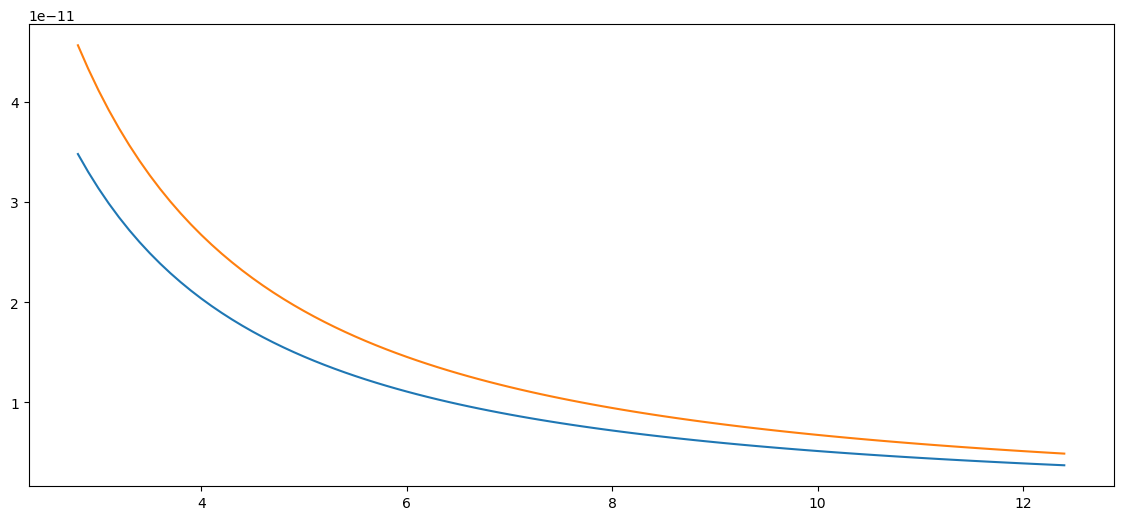

In [137]:
main()